## Homework
Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

### Dataset
For this homework, we'll use the Car Fuel Efficiency dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv)

You can do it with wget:

`wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv`

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

### Preparing the dataset
Use only the following columns:

* 'engine_displacement',
* 'horsepower',
* 'vehicle_weight',
* 'model_year',
* 'fuel_efficiency_mpg'

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
# Download the Dataset (! means a shell command executed from Jupyter, $ substitutes the URL with data):
!wget $data 

--2025-09-29 07:44:57--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.008s  

2025-09-29 07:44:57 (105 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [6]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [7]:
# Columns to use:
columns_used = ['engine_displacement',	'horsepower', 'vehicle_weight', 'model_year',	'fuel_efficiency_mpg']

In [8]:
df_new = df[columns_used]

In [9]:
df_new.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

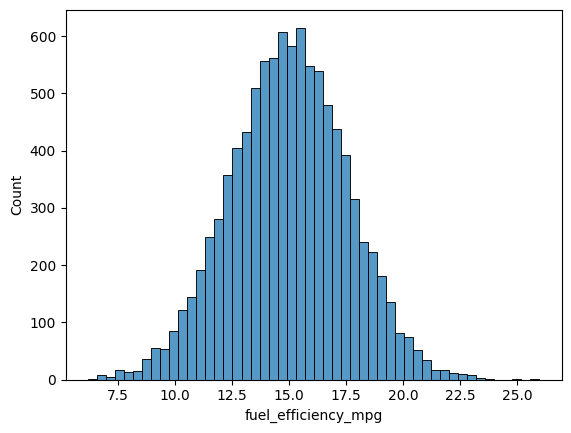

In [11]:
# Plot the horsepower variable:
sns.histplot(df_new.fuel_efficiency_mpg, bins=50)

### Question 1

There's one column with missing values. What is it?

- `engine_displacement`
- **`horsepower`**
- `vehicle_weight`
- `model_year`

In [12]:
df_new.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `horsepower`?

- 49
- 99
- **149**
- 199

In [13]:
df_new.horsepower.median()

np.float64(149.0)

### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use the same code as in the lectures.

In [14]:
n = len(df_new)

In [15]:
n

9704

In [16]:
idx = np.arange(n)

In [17]:
# Shuffle the dataset (the filtered one you created above), use seed 42:
np.random.seed(42)
np.random.shuffle(idx)

In [18]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [19]:
n_train, n_val, n_test

(5824, 1940, 1940)

In [20]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [21]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


### Question 3

We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using `round(score, 2)`.

Which option gives better RMSE?

Options:

- With 0
- **With mean**
- Both are equally good

In [24]:
# Fill missing values and convert Pandas Series into NumPy array:
base = ['engine_displacement',	'horsepower', 'vehicle_weight', 'model_year']
X_train_zero = df_train[base].fillna(0).values
X_val_zero = df_val[base].fillna(0).values

In [25]:
# Compute the mean of horsepower column using training:
hp_mean = df_train.horsepower.mean()
X_train_mean = df_train[base].fillna(hp_mean).values
X_val_mean = df_val[base].fillna(hp_mean).values

In [26]:
# Convert targets into NumPy array:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [27]:
# Train a linear regression model without regularization:
def train_linear_regression(X, y):
    # Add the bias column (intercept) of ones to the feature matrix X:
    ones = np.ones(X.shape[0]) 
    # The bias term is treated as just another weight
    X = np.column_stack([ones, X]) 

    # Summarize the relationships between features to get the covariance structure
    XTX = X.T.dot(X)
    # Invert 'X^T X' to isolate 'w' and undo the scaling and correlation between features
    XTX_inv = np.linalg.inv(XTX)
    # The weights are computed using the Normal Equation: [ w = (X^T X)^{-1} X^T y ]
    w_full = XTX_inv.dot(X.T).dot(y)

    # Return the Bias and Weights
    return w_full[0], w_full[1:]

### Fit the model

- **w0_zero:** The bias term/intercept represents the base prediction when all feature values are zero (a scalar value)
- **w_zero**: The vector of weights/coefficients for the features. Each weight corresponds to the importance of a feature in predicting the target variable.

train_linear_regression computes the weights and bias using the Normal Equation. 
the Normal Equation finds the best-fit parameters (w_zero and w0_zero) that minimize the error between the "predicted" values and the actual target values in the training data. Predicted meaning that features that have a stronger relationship with the target will receive higher weights because they reduce the errors more effectively. The explicit prediction y_pred_zero is computed for the training data to evaluate how well the model fits the training set.

In [28]:
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

# Predicted values for training examples based on features and corresponding weights
y_pred_zero = w0_zero + X_train_zero.dot(w_zero)

In [29]:
w0_zero, w_zero

(np.float64(28.82736547365895),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04]))

In [30]:
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0_mean + X_train_mean.dot(w_mean)

In [31]:
w0_mean, w_mean

(np.float64(28.925259951002698),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

<Axes: ylabel='Count'>

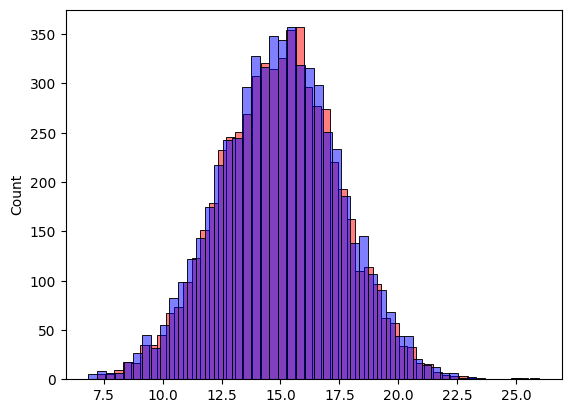

In [32]:
sns.histplot(y_pred_zero, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

<Axes: ylabel='Count'>

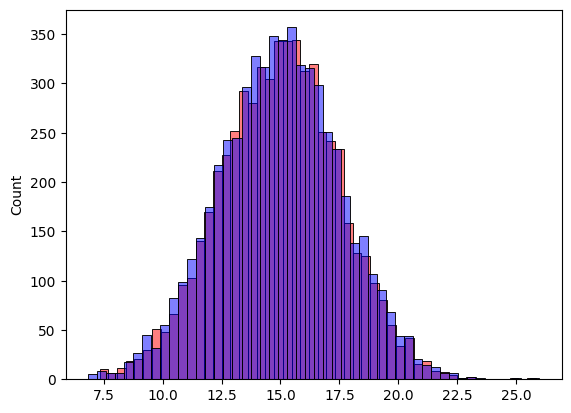

In [33]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [34]:
# Use the validation dataset to evaluate the models and compare the RMSE of each option:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [35]:
# Use preprocessing functions on validation sets:
def prepare_X_zero(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(hp_mean)
    X = df_num.values
    return X

In [36]:
# Round the RMSE scores to 2 decimal digits using `round(score, 2)`:
X_val_zero = prepare_X_zero(df_val)
y_pred_zero = w0_zero + X_val_zero.dot(w_zero) 
rmse_zero = round(rmse(y_val, y_pred_zero), 2)

In [37]:
rmse_zero

np.float64(0.52)

In [38]:
X_val_mean = prepare_X_mean(df_val)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean) 
rmse_mean = round(rmse(y_val, y_pred_mean), 2)

In [39]:
rmse_mean

np.float64(0.46)

### Question 4

Now let's train a regularized linear regression.

- For this question, fill the NAs with 0.
- Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.

Which `r` gives the best RMSE? If there are multiple options, select the smallest `r`.

Options:

- 0
- **0.01**
- 1
- 10
- 100

**1. Context: Regularized Linear Regression**
* In regular linear regression, the weights are computed using the Normal Equation:

    \[
        w = (X^T X)^{-1} X^T y
    \]

* However, if the matrix ( X^T X ) is singular (non-invertible) or close to singular, the inversion step becomes unstable. This can happen when:
    * Features are highly correlated (multicollinearity).
    * There are more features than data points.
* To address this, regularization is introduced. Regularization adds a penalty term to the loss function to prevent overfitting and stabilize the inversion.

**2. Regularization in the Normal Equation**
* Regularization modifies the Normal Equation to:

    \[
        w = (X^T X + **rI**)^{-1} X^T y
    \]

    where:
    * ( r ) is the regularization parameter (a positive scalar).
    * ( I ) is the identity matrix of the same size as ( X^T X ).
    
* The term ( rI ) ensures that ( X^T X + rI ) is always invertible, even if ( X^T X ) is singular.

**3. XTX = XTX + r * np.eye(XTX.shape[0]):**
* XTX is the matrix ( X^T X ).
* np.eye(XTX.shape[0]) creates an identity matrix ( I ) of the same size as ( X^T X ).
* r * np.eye(XTX.shape[0]) scales the identity matrix by the regularization parameter ( r ).
* Adding this scaled identity matrix to ( X^T X ) results in ( X^T X + rI ), which is the regularized version of ( X^T X ).

In [41]:
 # Add regularization parameter to the regular linear regression
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    # Scale the identity matrix by the regularization parameter 'r'
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [42]:
# Try different values of 'r'
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    # Preprocess and fit training set
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    # Preprocess and fit validation set
    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)

    # Evaluate the model
    score = rmse(y_val, y_pred)
    print(f"Regularization (r): {r:.2f} | Bias (w0): {w0:.4f} | RMSE: {score:.4f}")

Regularization (r): 0.00 | Bias (w0): 28.8274 | RMSE: 0.5174
Regularization (r): 0.01 | Bias (w0): 24.9268 | RMSE: 0.5171
Regularization (r): 0.10 | Bias (w0): 11.2397 | RMSE: 0.5188
Regularization (r): 1.00 | Bias (w0): 1.7316 | RMSE: 0.5222
Regularization (r): 5.00 | Bias (w0): 0.3638 | RMSE: 0.5229
Regularization (r): 10.00 | Bias (w0): 0.1831 | RMSE: 0.5230
Regularization (r): 100.00 | Bias (w0): 0.0184 | RMSE: 0.5231


## Question 5 

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

- Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.

- Round the result to 3 decimal digits (`round(std, 3)`).

What's the value of std?

- **0.001**
- 0.006
- 0.060
- 0.600

*Note*: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

The purpose of trying different seed values is to evaluate the stability of the model by testing how sensitive the model's performance is to the randomness introduced during the train/validation/test split.

In [43]:
# Initialize a list to store RMSE scores
rmse_scores = []

# Try different seed values
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)

    # Shuffle and split the dataset
    n = len(df_new)
    idx = np.arange(n)
    np.random.shuffle(idx)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = df_new.iloc[idx[:n_train]]
    df_val = df_new.iloc[idx[n_train:n_train + n_val]]
    df_test = df_new.iloc[idx[n_train + n_val:]]

    # Preprocess and fit training set
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    # Preprocess and fit validation set
    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)

    # Evaluate the model
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)  # Append the RMSE score to the list

    # Compute the standard deviation of RMSE scores
    std = np.std(rmse_scores)
    
    # Round the result to 3 decimal digits
    std_rounded = round(std, 3)
    
    print(f"Standard Deviation of RMSE scores: {std_rounded}")

Standard Deviation of RMSE scores: 0.0
Standard Deviation of RMSE scores: 0.001
Standard Deviation of RMSE scores: 0.001
Standard Deviation of RMSE scores: 0.001
Standard Deviation of RMSE scores: 0.001
Standard Deviation of RMSE scores: 0.001
Standard Deviation of RMSE scores: 0.001
Standard Deviation of RMSE scores: 0.001
Standard Deviation of RMSE scores: 0.001
Standard Deviation of RMSE scores: 0.001


The output indicates that the standard deviation of RMSE scores is consistently very low, starting at 0.0 and stabilizing at 0.001. This suggests that the RMSE scores across different random seeds are nearly identical, which implies that the model's performance is highly stable and not significantly affected by the randomness in the train/validation/test split.

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with `r=0.001`.

What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- **5.15**
- 51.5

In [44]:
# Combine train and validation datasets and use seed 9
np.random.seed(9)

# Shuffle and split the dataset
n = len(df_new)
idx = np.arange(n)
np.random.shuffle(idx)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df_train = df_new.iloc[idx[:n_train]]
df_val = df_new.iloc[idx[n_train:n_train + n_val]]
df_test = df_new.iloc[idx[n_train + n_val:]]

# Concatenate training and validation feature series
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
# Concatenate training and validation target arrays
y_full_train = np.concatenate([y_train, y_val]) 

# Preprocess and fit training set
X_full_train = prepare_X_zero(df_full_train)   
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# Preprocess and fit test set
X_test = prepare_X_zero(df_test)
y_pred = w0 + X_test.dot(w)

# Evaluate the model
score = rmse(y_test, y_pred)

# Debugging: Print RMSE score
print(f"RMSE on test set: {score}")

RMSE on test set: 2.452769696081445
